<a href="https://colab.research.google.com/github/jashanmalhi/Data-Analysis/blob/master/Used_Cars_Data_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="45px" src="https://colab.research.google.com/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px"></p>



<h1>The Used Cars Dataset Modelling</h1>

###Jashneet Kaur
###jks888@uregina.ca, Id 200380410
###University of Regina
###Spring / Summer 2019


## INTRODUCTION

###Scikit Algorithm 
I have an option of three scikit algorithms from the figure provided in the assignment. I can select any one from the three algorithms, either Lasso or Linear or Ridge Regression.

###Process and Justification
I have started to look for the algorithm from the provided figure itself. I have traced the figure with my requirements with the following steps:
####1: started and I have more than 50 dataset values
####2: I am not predicting a category. I am working on to predict a quantity that is I am analysing the statics of car pricing factors.
####3: I have less than 100k data set values so i move further in that direction from the figure.
####4: Now a few features are important to predict the car price like its transmission, odometer value, and year of manufacturing. 
####5: I am a little confused while choosing the few features or more features for the car price prediction. Hence, I have decided to implement the Lasso algorithm, Linear Regression and the Ridge regression algorithm to see the prediction outcomes. In the end I will choose one from the three algorithms, the one with better r square values. So I have three modelling algorithms to implement in the upcoming sections.
####6 Firstly I have mounted my gdrive and then accessed the input data file CarList.csv. Then worked on the data cleaning just like assignment 3. Once the data is ready I have applied the three algorithmsons by one.
#### Linear Regression
####  Ridge Regression
####  Lasso

  

NOTE: Here is a link to the file for better visuals : 
https://nbviewer.jupyter.org/github/jashanmalhi/Data-Analysis/blob/master/Used_Cars_Dataset_Modelling.ipynb

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
cd gdrive

/content/gdrive


In [5]:
cd My Drive

/content/gdrive/My Drive


In [0]:

#Importing the required libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
#read the file data into a ledger variable
ledger = pd.read_csv('CarList.csv') 


In [0]:
#delete the columns
del ledger["url"]
del ledger["city_url"]
del ledger["VIN"]
del ledger["image_url"]
del ledger["condition"]

In [0]:

#I have used the dropna command for all the rows where even any one column value is missing.
ledger = ledger.dropna()

#delete the rows where year < 1960 and price < 200 
ledger.drop(ledger[ledger.price < 2000].index, inplace = True)
ledger.drop(ledger[ledger.year < 1960].index, inplace = True)
ledger.sort_values(["year"], ascending=False, inplace=True)
ledger.drop(ledger[ledger.price > 65000].index, inplace = True)
ledger.drop(ledger[ledger.odometer < 20000].index, inplace = True)
ledger.drop(ledger[ledger.odometer > 100000].index, inplace = True)

#sorted the listings by the year of manufacture in descending order
ledger = ledger.reset_index(drop=True)

Text(0.5, 1.0, 'Fig 1 : Car price vs count of listings for that price')

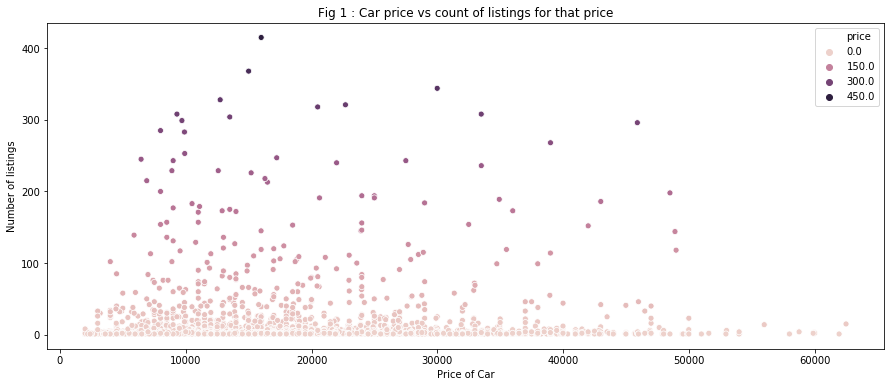

In [65]:
plt.figure(figsize=(15,6))
ax = sns.scatterplot(x="price", y=ledger['price'].value_counts(), hue=ledger['price'].value_counts(), data=ledger)
plt.xlabel("Price of Car")
plt.ylabel("Number of listings")
plt.title("Fig 1 : Car price vs count of listings for that price")

In [0]:
#taking only required columns in variables
from sklearn.model_selection import train_test_split 

data = ledger
odoyear = data[['year', 'odometer']]
price = data['price']

X_train, X_test, y_train, y_test = train_test_split(price, odoyear, test_size=0.2, random_state=0)

price_val = X_train
year_odo = y_train
x_odometer = year_odo.drop(['year'],axis=1)
x_year = year_odo.drop(['odometer'],axis=1)

In [48]:
#Creating principal component DataFrame for the columns 'year' and 'odometer'
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(year_odo)
principalDf = pd.DataFrame(data = principalComponents,
                          columns = ['principal component', ])
principalDf.head(5)

,principal component
0,1588.663604
1,-24390.335987
2,11133.663978
3,-35233.335789
4,27266.664087


Implementing the Linear regression and calculating the R squared  value for comparison

Slope: [0.14444276]
Intercept: 16347.40586913166
Root mean squared error:  85495016.01752882
R2 score:  0.1179497931554625


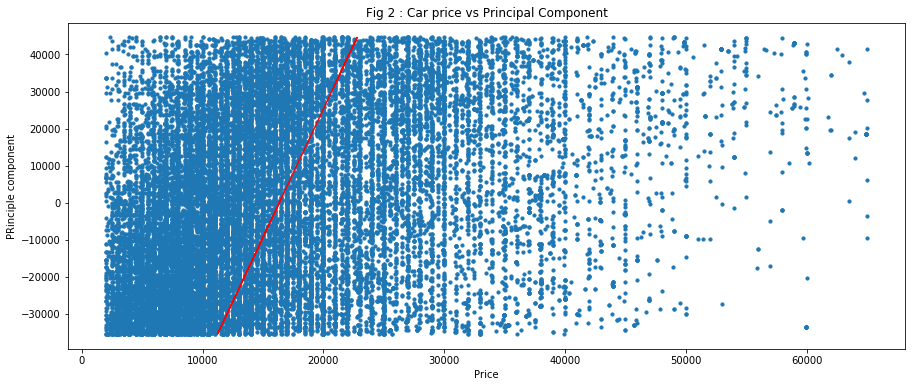

In [66]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_reg = LinearRegression()

lin_reg.fit(principalDf, price_val)

price_predicted = lin_reg.predict(principalDf)

# model evaluation
rmse = mean_squared_error(price_val, price_predicted)
r2 = r2_score(price_val, price_predicted)

# printing values
print('Slope:' ,lin_reg.coef_)
print('Intercept:', lin_reg.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

# plotting values
plt.figure(figsize=(15,6))
# data points
plt.scatter(price_val, principalDf, s=10,)
plt.xlabel('Price')
plt.ylabel('PRinciple component')
plt.title("Fig 2 : Car price vs Principal Component")
# predicted values
plt.plot(price_predicted, principalDf, color='r')
plt.show()

Implementing the Ridge regression and calculating the R squared  value for comparison

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

ridge = Ridge()

ridge.fit(principalDf, price_val)

price_predicted = ridge.predict(principalDf)

# model evaluation
rmse = mean_squared_error(price_val, price_predicted)
r2 = r2_score(price_val, price_predicted)

# printing values
print('Slope:' ,ridge.coef_)
print('Intercept:', ridge.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)


Slope: [0.14444276]
Intercept: 16347.40586913166
Root mean squared error:  85495016.01752882
R2 score:  0.1179497931554625


Implementing the Lasso and calculating the R squared value for comparison



In [57]:
from sklearn.linear_model import Lasso

lasso = Lasso()

lasso.fit(principalDf, price_val)

price_predicted = lasso.predict(principalDf)

# model evaluation
rmse = mean_squared_error(price_val, price_predicted)
r2 = r2_score(price_val, price_predicted)

# printing values
print('Slope:' ,lasso.coef_)
print('Intercept:', lasso.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)


Slope: [0.14444276]
Intercept: 16347.40586913166
Root mean squared error:  85495016.01752882
R2 score:  0.1179497931554625


# ALGORITHM APPLICATION

From all the algorithms the R square values of all the algorithms are approximately same. However R suare of the linear regression is a little better so I have decided to implement the Linear regression model.
###Algorithm Working
Linear Regression is a machine learning algorithm that helps to map independent numeric value inputs to a dependent numeric value output. Once the model is trained then it is able to predict the output values based on the inputs provided. It finds the line that best fits the data points on a graph. This line helps us to see the trend of the output values and we could predict the output values which are not present in our dataset. The simple linear regression equation is: Ε(y) = (β0 +β1 x).
This equation gives us the line that fits on the data plots. (Gigi, 2019)

###Implementation
To implement the linear regression in scikit, firstly I have imported the required libraries and then used the LinearRegression method provided in the scikit linear model class. I have reduced the dimentions of the independent data set by using the principal component method PCA. Now I have 2 dimentional dataset with which I can train the linear regression model by calling the 'fit' method. I have created another variable that uses the 'predict()' function to create a predicted value of teh price when the input of year and odometer value is given. (Scikit, 2019) 

####Model Creation 
The linear regression model is created during the algorithm implementation and then I have plotted the actual values in a scatterplot and the predicted values in a linear line graph. The plot helps in understanding the trend of increase in price as the independent values change.

####Data Preparation
For the test data I am going to use the data values that I have had removed initially during data cleaning process. I will use those data values to check the predicting accuracy of the algorithm. 

For training the model I have used the cleaned dataset values after removing the outliers and the values which were not helpful in training the model. The independent values of odometer and year were converted to a single dimension by using the PCA method. this helped in performing the model training and in plotting the datasets.

**********************************************************************************************

# VISUALIZATION

####Data Visualization
For better understanding of the change in predicted values I have plotted the scatter plot against the odometer values and price values and a linear graph using the predicted values against the odometer values.
Simillary I have visualized the scatterplot using the year and price values and a line graph using the predicted values against the year values. This will help in understanding the change in predicted values based on both the independent variables.
The linear regression plot of the principal component and the price is shown above. That graph includes the predicted line using both the year and odometer values.
####Labelling 
In all the three plots the Price has been plotted on the x-axis, whereas the y axis values change with respect to the second component used for plotting. The graph labelling is done and the title has been given for each one of them for ease in recognition of the plotted values.

####Data Plotting
Data plotting gives us some significant information. In Fig 2, we can see that with the increse in value of principal component, the car prices afre increasing. And from the below plots, Fig 3 and 4 we can see that with the old manufactured cars are available for less price and the cars with high value of odometer is available for less price. The outcomes from the plotting gives better understanding of the prediction line.

####Regression r-squared values
The R squared values for all the three different algorithms is shown above.


Slope: [-0.14444276]
Intercept: 25676.770571909998
Root mean squared error:  3130411201.623255
R2 score:  -31.296383772056743


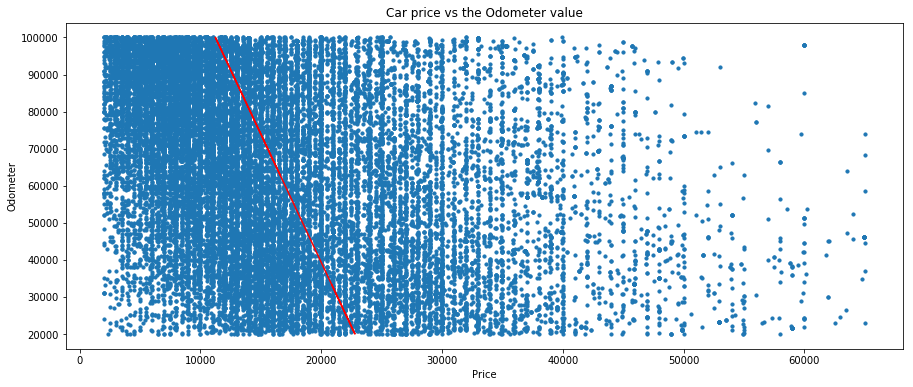

In [60]:
lin_reg = LinearRegression()

lin_reg.fit(x_odometer, price_val)

price_predicted = lin_reg.predict(x_odometer)

# model evaluation
rmse = mean_squared_error(price_val, x_odometer)
r2 = r2_score(price_val, x_odometer)

# printing values
print('Slope:' ,lin_reg.coef_)
print('Intercept:', lin_reg.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

# plotting values
plt.figure(figsize=(15,6))
# data points
plt.scatter( price_val,x_odometer, s=10)
plt.xlabel('Price')
plt.ylabel('Odometer')
plt.title("Fig 3 : Car price vs the Odometer value")
# predicted values
plt.plot( price_predicted, x_odometer, color='r')
plt.show()

Slope: [350.55419456]
Intercept: -688497.9049438043
Root mean squared error:  302418598.67295575
R2 score:  -2.1200460557656964


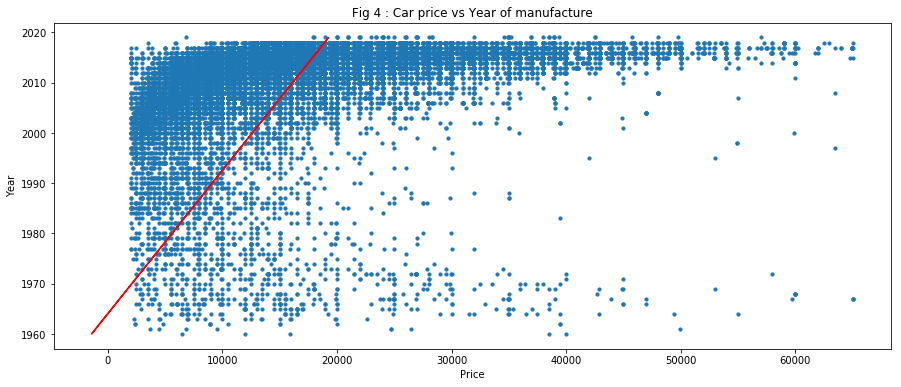

In [67]:
lin_reg = LinearRegression()

lin_reg.fit(x_year, price_val)

price_predicted = lin_reg.predict(x_year)

# model evaluation
rmse = mean_squared_error(price_val, x_year)
r2 = r2_score(price_val, x_year)

# printing values
print('Slope:' ,lin_reg.coef_)
print('Intercept:', lin_reg.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

# plotting values
plt.figure(figsize=(15,6))

# data points
plt.scatter( price_val,x_year, s=10)
plt.xlabel('Price')
plt.ylabel('Year')
plt.title("Fig 4 : Car price vs Year of manufacture")
# predicted values
plt.plot( price_predicted,x_year, color='r')
plt.show()

# DISCUSSION

####Model Implications

####Fictional Instance

####Potential accuracy in interpolation and extrapolration

# SUMMARY

####Conclusion

####Future Aspects

####Knowledge gathered

# REFERENCES

Austin Reese (2019) "Used Cars Dataset" Vehicles listings from Craigslist.org. Available at: https://www.kaggle.com/austinreese/craigslist-carstrucks-data/version/7.


Tomesh, T. (2019). titanic.ipynb. Available at: https://colab.research.google.com/drive/1KftGp4lGzd7PJuKWq9qDv3xnxiQbwhwY#scrollTo=Y2tOGJ2UYPVi [Accessed 16 Aug. 2019].


Stach Overflow (2019) Available at https://stackoverflow.com/questions/33165734/update-index-after-sorting-data-frame [Accessed 17 Aug 2019]


TutorialsPoint (2019 )Available at https://www.tutorialspoint.com/python_pandas/python_pandas_dataframe.html [Accessed 18 Aug 2019]


Chris ALbon (2017), "Using Seaborn To Visualize A pandas Dataframe"  Available at: https://chrisalbon.com/python/data_wrangling/pandas_with_seaborn/  [Accessed 18 Aug 2019]


Marco Peixeiro (2019), "How to Perform Lasso and Ridge Regression in Python" Available at: https://towardsdatascience.com/how-to-perform-lasso-and-ridge-regression-in-python-3b3b75541ad8
[Accessed 25 Aug 2019]

Gigi Devault (2019) "What Simple Linear Regression Is and How It Works" Available at: https://www.thebalancesmb.com/what-is-simple-linear-regression-2296697

Scikit Learn (2019) "Linear Regression Example" Available at:https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
